# Exaploratory Data Analysis (EDA)

Unlike hypothesis-driven analyses guided by prior domain knowledge, EDA is a flexible, open-ended exploration that allows data scientists to examine data without predefined assumptions. It serves as an initial step to uncover patterns, trends, and correlations that inspire hypothesis generation. Practically, EDA helps formulate data-driven hypotheses, which can then be tested alongside domain-based hypotheses, enhancing understanding and validating insights.

This notebook demonstrates a comprehensive examination of a sample dataset. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###  Data Collection
Demonstrated on the [Ames Housing Dataset](https://www.kaggle.com/datasets/prevek18/ames-housing-dataset?select=AmesHousing.csv)
 obtained from [Kaggle](https://www.kaggle.com).

Since this notebook focuses on EDA, the entire dataset will be analyzed without splitting into train and validation sets.

In [2]:
df = pd.read_csv('AmesHousing.csv', index_col=0)
print(f"DataFrame:\n{'Rows:':<10}{df.shape[0]:<10}\n{'Columns:':<10}{df.shape[1]:<10}")
print(f"\t{'Object:':<10}{df.select_dtypes(include='object').shape[1]}")
print(f"\t{'Float64:':<10}{df.select_dtypes(include='float64').shape[1]}")
print(f"\t{'Int64:':<10}{df.select_dtypes(include='int64').shape[1]}")
display(df.head(5))

DataFrame:
Rows:     2930      
Columns:  81        
	Object:   43
	Float64:  11
	Int64:    27


,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### Descriptive Statistics

The predicted feature of this dataset is 'SalePrice' (not covered in this notebook)

In [20]:
output_col_name = 'SalePrice'
print(f'Column- {output_col_name} description:')
df[output_col_name].describe()


Column- SalePrice description:


count      2927.000000
mean     180805.550735
std       79880.475356
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

Histogram of SalesPrice

<Axes: xlabel='SalePrice', ylabel='Count'>

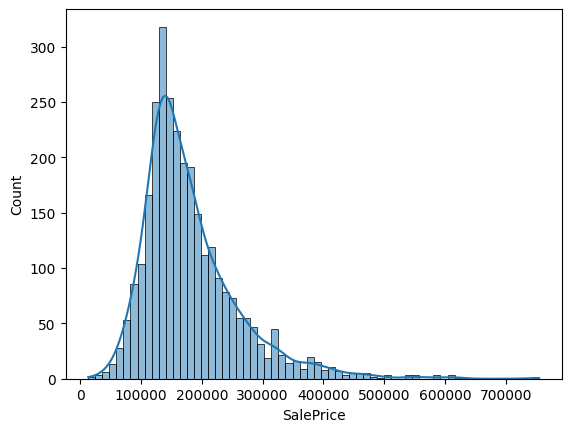

In [21]:
sns.histplot(df[output_col_name], kde=True)

SalePrice deviates from Normal distribution and is positively (right) skewed.

SalesPrice shoes "peakedness"

In [23]:
print(f"Skewness: {df[output_col_name].skew():.4f}")
print(f"Kurtosis: {df[output_col_name].kurt():.4f}")

Skewness: 1.7453
Kurtosis: 5.1271


In [ ]:
# Use this function to get a summary of a large DataFrame to simplify the examination of each feature

def summary(df: pd.DataFrame) -> pd.DataFrame:
    """Generate a comprehensive summary of a pandas DataFrame.

    Args:
        df (pd.DataFrame): DataFrame to be summarized.

    Returns:
        pd.DataFrame: 
    """
    summary = []
    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        col_missing = df[col_name].isnull().sum()
        col_not_null = df[col_name].notnull().sum()
        col_unique = df[col_name].nunique()  # number of distinct values excluding NaN
        if col_unique <= 10:
            distinct_values = df[col_name].value_counts().to_dict()
        else:
            distinct_values = df[col_name].value_counts().head(10).to_dict()
        if np.issubdtype(df[col_name].dtype, np.number):
            col_min = df[col_name].min()
            col_max = df[col_name].max()
            col_mean = df[col_name].mean()
            col_std = df[col_name].std()
            col_median = df[col_name].median()
        else:
            col_min, col_max, col_mean, col_median, col_std = None, None, None, None, None
        summary.append({
            "column": col_name,
            "dtype": col_dtype,
            "missing": col_missing,
            "not_null": col_not_null,
            "unique": col_unique,
            "distinct_values": distinct_values,
            "min": col_min,
            "max": col_max,
            "mean": col_mean,
            "median": col_median,
            "std": col_std
        })
    return pd.DataFrame(summary)

In [4]:
summary_df = summary(df)
display(summary_df)

,column,dtype,missing,not_null,unique,distinct_values,min,max,mean,median,std
0,PID,int64,0,2930,2930,"{526301100: 1, 535375130: 1, 535378080: 1, 535...",526301100.0,1.007100e+09,7.144645e+08,535453620.0,1.887308e+08
1,MS SubClass,int64,0,2930,16,"{20: 1079, 60: 575, 50: 287, 120: 192, 30: 139...",20.0,1.900000e+02,5.738737e+01,50.0,4.263802e+01
2,MS Zoning,object,0,2930,7,"{'RL': 2273, 'RM': 462, 'FV': 139, 'RH': 27, '...",NaN,NaN,NaN,NaN,NaN
3,Lot Frontage,float64,490,2440,128,"{60.0: 276, 80.0: 137, 70.0: 133, 50.0: 117, 7...",21.0,3.130000e+02,6.922459e+01,68.0,2.336533e+01
4,Lot Area,int64,0,2930,1960,"{9600: 44, 7200: 43, 6000: 34, 9000: 29, 10800...",1300.0,2.152450e+05,1.014792e+04,9436.5,7.880018e+03
...,...,...,...,...,...,...,...,...,...,...,...
76,Mo Sold,int64,0,2930,12,"{6: 505, 7: 449, 5: 395, 4: 279, 8: 233, 3: 23...",1.0,1.200000e+01,6.216041e+00,6.0,2.714492e+00
77,Yr Sold,int64,0,2930,5,"{2007: 694, 2009: 648, 2006: 625, 2008: 622, 2...",2006.0,2.010000e+03,2.007790e+03,2008.0,1.316613e+00
78,Sale Type,object,0,2930,10,"{'WD ': 2536, 'New': 239, 'COD': 87, 'ConLD': ...",NaN,NaN,NaN,NaN,NaN
79,Sale Condition,object,0,2930,6,"{'Normal': 2413, 'Partial': 245, 'Abnorml': 19...",NaN,NaN,NaN,NaN,NaN


### Handling Missing Data

Null values in numerical columns that indicate a feature potentially irrelevant to a listing (e.g., Garage Size) and do not contain any listing with a value of 0.0 are assumed to be irrelevant for those listings and are replaced with 0.

Listing with null numerical features following this step are dropped 

Null values in categorical columns that indicate a feature potentially irrelevant to a listing (e.g., Garage Type) are replaced with 'NA'

In [5]:
# Numerical columns where missing values should be mapped to 0
map_null_zero_cols = ['Lot Frontage', 'Mas Vnr Area', 'Garage Yr Blt']
df[map_null_zero_cols] = df[map_null_zero_cols].fillna(0.0)
# Map categorical columns Null values to cagtegory 'NA'
df[df.select_dtypes('object').columns] = df.select_dtypes('object').fillna('NA')
# Drop all rows where there is a missing numerical value
df = df.dropna()
print(f"DataFrame:\n{'Rows:':<10}{df.shape[0]:<10}\n{'Columns:':<10}{df.shape[1]:<10}")


DataFrame:
Rows:     2927      
Columns:  81        


### Univariate Analysis

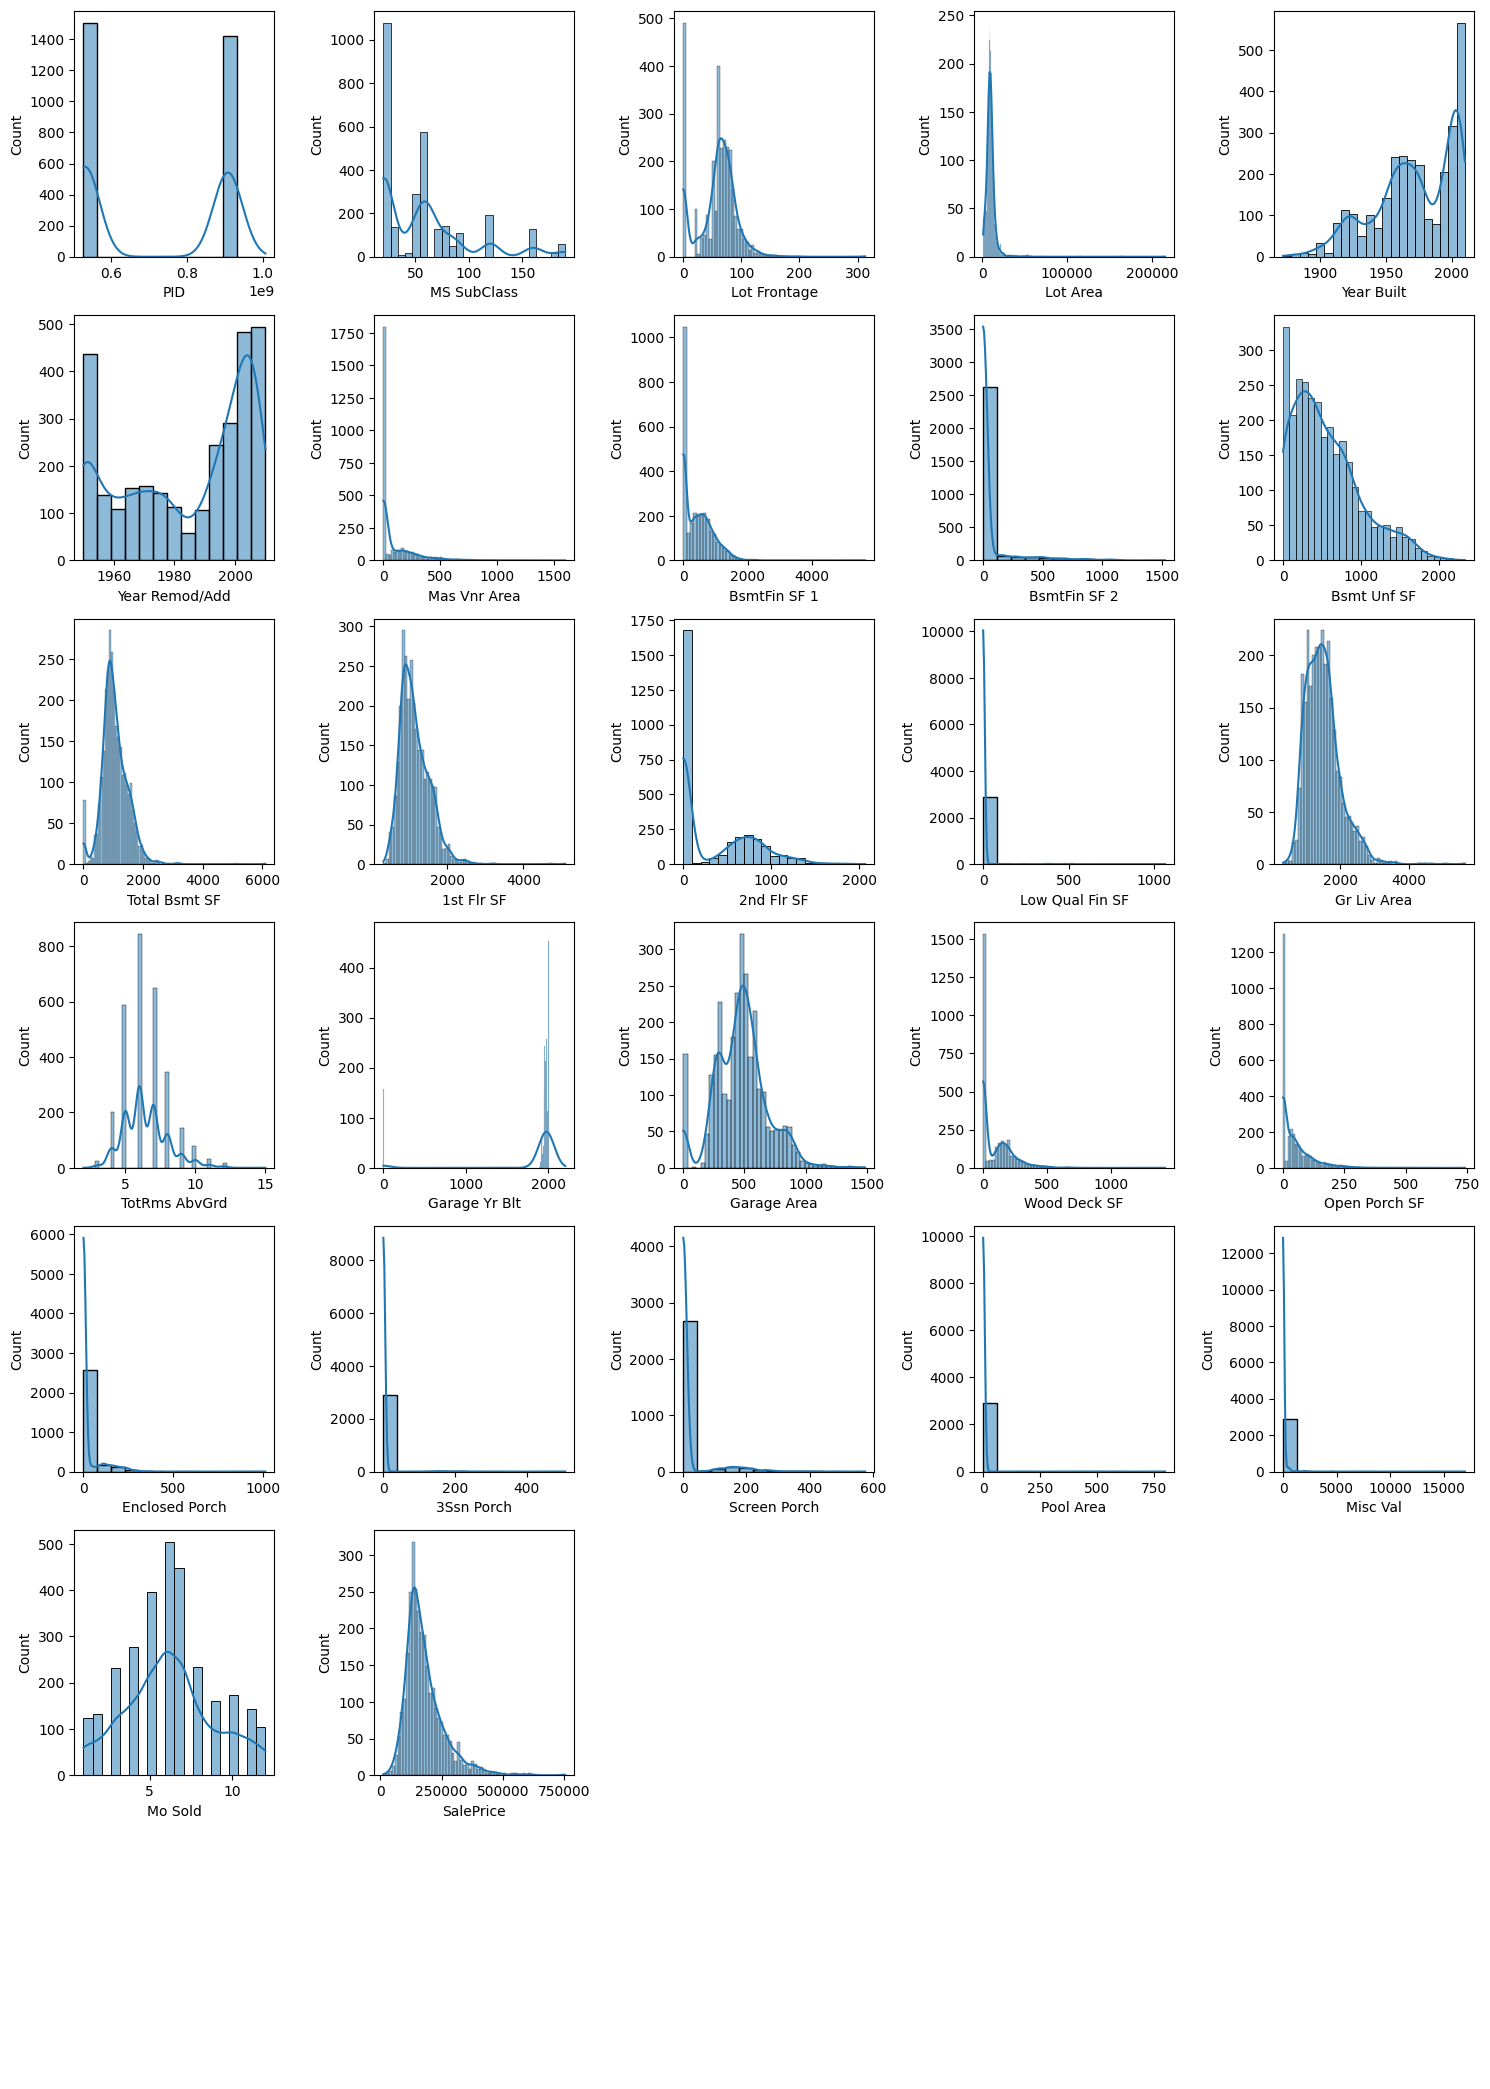

In [9]:
# Identify numerical columns with more than 10 unique values
numerical_cols = df.select_dtypes(include=['number'])  # Select numerical columns
cont_numerical_df = numerical_cols.loc[:, numerical_cols.nunique() > 10]
cont_numerical_cols = cont_numerical_df.columns
# determine the grid size for plotting the continuous numerical columns
grid_cols = 5
num_plots = len(cont_numerical_cols)
grid_rows = (num_plots // grid_cols) + (num_plots % grid_cols)

# Create subplots with the calculated number of rows and columns
fig, axs = plt.subplots(grid_rows, grid_cols, figsize=(15, 3*grid_rows))

# Flatten axs array for easier indexing
axs = axs.flatten()

# Plot each column
for i in range(num_plots):
        col = cont_numerical_df[cont_numerical_cols[i]]
        sns.histplot(col, ax=axs[i], kde=True)
        plt.xlabel(cont_numerical_cols[i])
        plt.ylabel('Frequency')
# Turn off any unused subplots
for j in range(num_plots, len(axs)):
    axs[j].axis('off')
plt.tight_layout()
plt.show()


2) Data Cleaning and Preprocessing
3) Descriptive Statistics
4) Univariate Analysis
5) Bivariate Analysis
6) Multivariate Analysis
7) Feature Engineering
8) Visualization

### **EDA Checklist for Portfolio Project (Ames Housing Dataset)**  

#### **1️⃣ Data Loading & Overview**  
✅ Load dataset (`pd.read_csv()`)  
✅ Check shape (`df.shape`)  
✅ Display first few rows (`df.head()`)  
✅ Get column data types (`df.info()`)  

#### **2️⃣ Handling Missing Data**  
✅ Count missing values (`df.isnull().sum()`)  
✅ Visualize missing data (`sns.heatmap(df.isnull(), cbar=False)`)  
✅ Decide on imputation strategies (mean, median, mode, or drop)  

#### **3️⃣ Summary Statistics & Distributions**  
✅ Generate descriptive stats (`df.describe()`)  
✅ Check categorical value counts (`df['column'].value_counts()`)  
✅ Visualize distributions (histograms, KDE plots, boxplots)  
  ```python
  sns.histplot(df['SalePrice'], bins=50, kde=True)
  ```  
✅ Detect skewness & transform if needed (`df.skew()`)  

#### **4️⃣ Outlier Detection & Handling**  
✅ Use **boxplots** to find extreme values  
  ```python
  sns.boxplot(x=df['SalePrice'])
  ```  
✅ Use **IQR method** to filter outliers  
✅ Consider **log transformation** if necessary  

#### **5️⃣ Feature Relationships & Correlations**  
✅ Compute correlation matrix (`df.corr()`)  
✅ **Heatmap** of correlations  
  ```python
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
  ```  
✅ **Pairplot** of key numerical variables  
  ```python
  sns.pairplot(df[['SalePrice', 'GrLivArea', 'TotalBsmtSF']])
  ```  
✅ **Categorical vs. Numerical** comparisons (bar plots, boxplots)  
  ```python
  sns.boxplot(x='OverallQual', y='SalePrice', data=df)
  ```  

#### **6️⃣ Feature Engineering & Transformation**  
✅ Convert categorical variables (`pd.get_dummies()`, `LabelEncoder`)  
✅ Create new features (e.g., **TotalSF = GrLivArea + TotalBsmtSF**)  
✅ Standardize or normalize data (`MinMaxScaler`, `StandardScaler`)  

#### **7️⃣ Insights & Conclusion**  
✅ Summarize key findings (price trends, influential features)  
✅ Save cleaned dataset for modeling (`df.to_csv('cleaned_data.csv', index=False)`)  

---

Would you like me to help structure a **notebook template** for this? 🚀